In [1]:
import cv2
import numpy as np 

In [2]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import random

In [3]:
Directory = r"C:\Users\Asus\Downloads\project"

In [4]:
Directory

'C:\\Users\\Asus\\Downloads\\project'

In [5]:
CATEGORIES = ['dismantle','good','repair',]

In [6]:
for category in CATEGORIES:
    folder = os.path.join(Directory,category)
    print(folder)

C:\Users\Asus\Downloads\project\dismantle
C:\Users\Asus\Downloads\project\good
C:\Users\Asus\Downloads\project\repair


In [7]:
for category in CATEGORIES:
    folder = os.path.join(Directory,category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        print(img_path)
        break

C:\Users\Asus\Downloads\project\dismantle\blog-scrap-timber.jpg
C:\Users\Asus\Downloads\project\good\box-2064180_640.jpg
C:\Users\Asus\Downloads\project\repair\broken-cargo-pallet-open-manhole-shaft-broken-pallet-shaft-201241351.webp


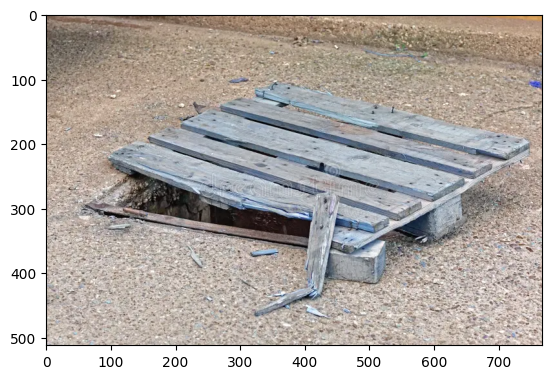

In [8]:
img_arr = cv2.imread(img_path)
plt.imshow(img_arr)

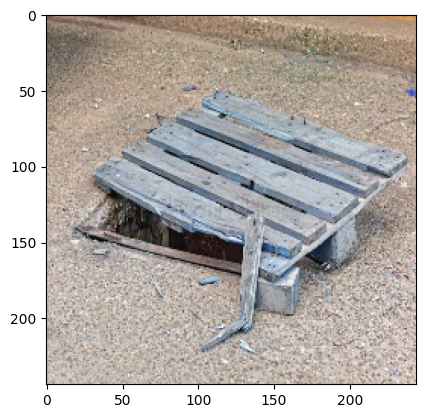

In [9]:
#Image resize 
IMG_SIZE = 244
image_size = cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
plt.imshow(image_size)

In [10]:
data = []

for category in CATEGORIES:
    folder = os.path.join(Directory, category)
    labels = CATEGORIES.index(category)
    
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        
        # Load the image and check if it's None
        img_arr = cv2.imread(img_path)
        if img_arr is None:
            print(f"Error reading image: {img_path}")
            continue
        
        # Resize the image
        image_size = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        
        # Append image and label to the data list
        data.append([image_size, labels])

In [11]:
len(data)

337

In [12]:
# Shuffle the data
random.shuffle(data)

X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

In [13]:
# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

In [14]:
# Normalize pixel values to [0, 1]
X = X / 255.0

In [15]:
 # Resize the image
image_size = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        


In [16]:
from keras.utils import to_categorical


In [17]:
# Convert labels to one-hot encoded format
labels_onehot = to_categorical(y)

In [18]:
print(labels_onehot)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [19]:
from sklearn.model_selection import train_test_split


In [20]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,labels_onehot, test_size=0.2,random_state=42)

In [21]:
from keras.preprocessing.image import ImageDataGenerator

In [152]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2)


In [46]:
# Fit the data generator to the training data
datagen.fit(X_train)

# model building using CNN

In [153]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

In [180]:
cnnmodel = Sequential()

cnnmodel.add(Conv2D (32, (3,3), activation = 'relu',input_shape=(IMG_SIZE, IMG_SIZE, 3)))

cnnmodel.add(MaxPooling2D((2,2)))


cnnmodel.add(Conv2D(64, (3,3), activation = 'relu'))

cnnmodel.add(MaxPooling2D((2,2)))
  
cnnmodel.add(Conv2D(128, (3, 3), activation='relu'))

cnnmodel.add(MaxPooling2D((2,2)))

cnnmodel.add(Flatten())

cnnmodel.add(Dense (512, activation = 'relu'))

cnnmodel.add(Dropout(0.5))

cnnmodel.add(Dense (3, activation = 'softmax'))

In [181]:
# Compile the model
cnnmodel.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [275]:
num_epochs = 10
batch_size = 64

cnnmodel.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                 epochs=num_epochs,
                 validation_data=(X_test, y_test))

Epoch 1/10
5/5 [==============================] - 16s 3s/step - loss: 0.5898 - accuracy: 0.7175 - val_loss: 0.9051 - val_accuracy: 0.5735
Epoch 2/10
5/5 [==============================] - 16s 3s/step - loss: 0.6080 - accuracy: 0.7138 - val_loss: 0.8478 - val_accuracy: 0.6765
Epoch 3/10
5/5 [==============================] - 17s 4s/step - loss: 0.5462 - accuracy: 0.7584 - val_loss: 0.9757 - val_accuracy: 0.6324
Epoch 4/10
5/5 [==============================] - 16s 3s/step - loss: 0.5314 - accuracy: 0.7881 - val_loss: 1.0078 - val_accuracy: 0.6618
Epoch 5/10
5/5 [==============================] - 17s 4s/step - loss: 0.6694 - accuracy: 0.7212 - val_loss: 1.0930 - val_accuracy: 0.6176
Epoch 6/10
5/5 [==============================] - 17s 3s/step - loss: 0.6467 - accuracy: 0.7138 - val_loss: 0.9277 - val_accuracy: 0.6176
Epoch 7/10
5/5 [==============================] - 17s 3s/step - loss: 0.5672 - accuracy: 0.7212 - val_loss: 0.8591 - val_accuracy: 0.6471
Epoch 8/10
5/5 [==================

In [276]:
# Evaluate the model
loss, accuracy = cnnmodel.evaluate(X_train, y_train)
print(f"train Accuracy: {accuracy:.2f}")

9/9 [==============================] - 4s 398ms/step - loss: 0.3219 - accuracy: 0.8662
train Accuracy: 0.87


In [277]:
# Evaluate the model
loss, accuracy = cnnmodel.evaluate(X_test, y_test)
print(f"test Accuracy: {accuracy:.2f}")

3/3 [==============================] - 1s 256ms/step - loss: 0.9555 - accuracy: 0.6176
test Accuracy: 0.62


In [283]:
# Load your unseen image
unseen_image_path = r"C:\Users\Asus\Downloads\DamagedPallets.jpg"
IMG_SIZE = 244

In [284]:
from PIL import Image

In [285]:
# Load and preprocess the unseen image
unseen_image = Image.open(unseen_image_path)
unseen_image = unseen_image.resize((IMG_SIZE, IMG_SIZE))  # Resize to match model input size
unseen_image_array = np.array(unseen_image) / 255.0  # Normalize pixel values


In [286]:
# Reshape the image array to match the model input shape
unseen_image_array = np.reshape(unseen_image_array, (1, IMG_SIZE, IMG_SIZE, 3))


In [287]:
# Make a prediction
prediction = cnn_model.predict(unseen_image_array)
predicted_class = np.argmax(prediction, axis=1)[0]
predicted_category = CATEGORIES[predicted_class]


1/1 [==============================] - 0s 221ms/step


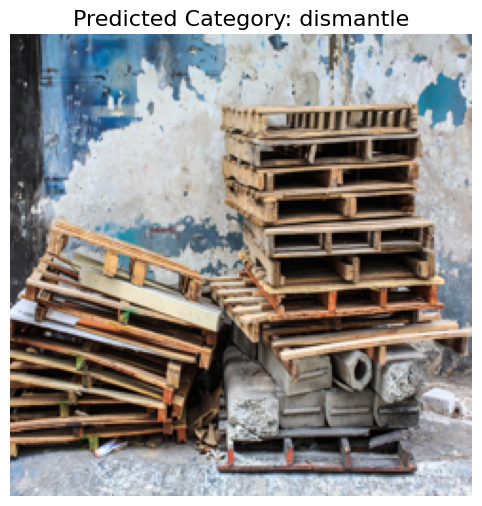

In [288]:
# Display the image with prediction
plt.figure(figsize=(8, 6))
plt.imshow(unseen_image)
plt.title(f"Predicted Category: {predicted_category}", fontsize=16)
plt.axis('off')
plt.show()

In [289]:
# Load your unseen image
unseen_image_path = r"C:\Users\Asus\Downloads\find-free-pallets-easily-with-these-tips-1357101-hero-37186b82884f433f893ce0f5d4bb8688-1536x1152.jpg"
IMG_SIZE = 244

In [290]:
# Load and preprocess the unseen image
unseen_image = Image.open(unseen_image_path)
unseen_image = unseen_image.resize((IMG_SIZE, IMG_SIZE))  # Resize to match model input size
unseen_image_array = np.array(unseen_image) / 255.0  # Normalize pixel values


In [291]:
# Reshape the image array to match the model input shape
unseen_image_array = np.reshape(unseen_image_array, (1, IMG_SIZE, IMG_SIZE, 3))


In [292]:
# Make a prediction
prediction = cnn_model.predict(unseen_image_array)
predicted_class = np.argmax(prediction, axis=1)[0]
predicted_category = CATEGORIES[predicted_class]

1/1 [==============================] - 0s 154ms/step


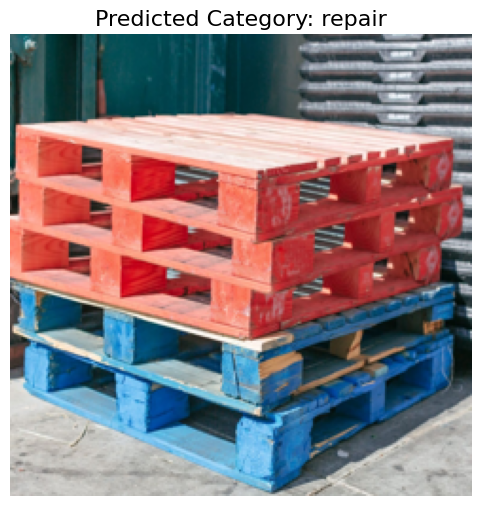

In [293]:
plt.figure(figsize=(8, 6))
plt.imshow(unseen_image)
plt.title(f"Predicted Category: {predicted_category}", fontsize=16)
plt.axis('off')
plt.show()

In [294]:
unseen_image_path = r"C:\Users\Asus\Downloads\broken-pallets-big.jpg"
IMG_SIZE = 244

In [295]:
# Load and preprocess the unseen image
unseen_image = Image.open(unseen_image_path)
unseen_image = unseen_image.resize((IMG_SIZE, IMG_SIZE))  # Resize to match model input size
unseen_image_array = np.array(unseen_image) / 255.0  # Normalize pixel values


In [296]:
# Reshape the image array to match the model input shape
unseen_image_array = np.reshape(unseen_image_array, (1, IMG_SIZE, IMG_SIZE, 3))


In [297]:
# Make a prediction
prediction = cnn_model.predict(unseen_image_array)
predicted_class = np.argmax(prediction, axis=1)[0]
predicted_category = CATEGORIES[predicted_class]

1/1 [==============================] - 0s 178ms/step


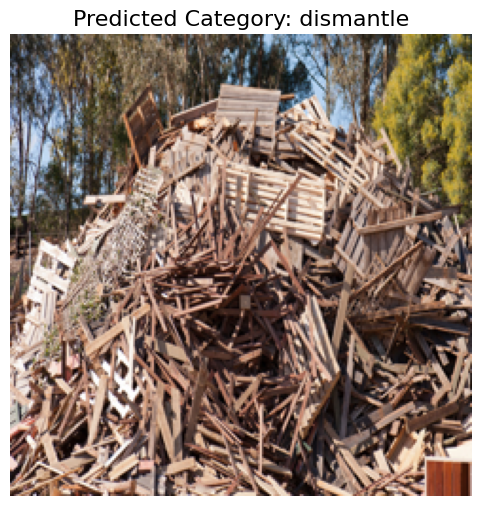

In [298]:
plt.figure(figsize=(8, 6))
plt.imshow(unseen_image)
plt.title(f"Predicted Category: {predicted_category}", fontsize=16)
plt.axis('off')
plt.show()

In [299]:
unseen_image_path = r"C:\Users\Asus\Downloads\images (34).jfif"
IMG_SIZE = 244

In [300]:
# Load and preprocess the unseen image
unseen_image = Image.open(unseen_image_path)
unseen_image = unseen_image.resize((IMG_SIZE, IMG_SIZE))  # Resize to match model input size
unseen_image_array = np.array(unseen_image) / 255.0  # Normalize pixel values


In [301]:
# Reshape the image array to match the model input shape
unseen_image_array = np.reshape(unseen_image_array, (1, IMG_SIZE, IMG_SIZE, 3))


In [302]:
# Make a prediction
prediction = cnnmodel.predict(unseen_image_array)
predicted_class = np.argmax(prediction, axis=1)[0]
predicted_category = CATEGORIES[predicted_class]

1/1 [==============================] - 0s 49ms/step


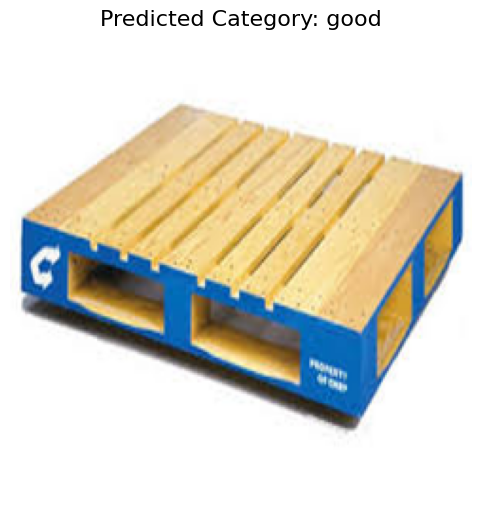

In [303]:
plt.figure(figsize=(8, 6))
plt.imshow(unseen_image)
plt.title(f"Predicted Category: {predicted_category}", fontsize=16)
plt.axis('off')
plt.show()

# model building using svm


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [23]:
# Flatten the images
X_flat = X.reshape(X.shape[0], -1)  # Reshape to (n_samples, height * width * channels)

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)


In [25]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

In [26]:
# Train the SVM model on the training data
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [27]:
# Make predictions on the training data
X_train_pred = svm_classifier.predict(X_train)

In [28]:
# Make predictions on the test data
X_test_pred = svm_classifier.predict(X_test)


In [29]:
train_accuracy = accuracy_score(y_train, X_train_pred)
test_accuracy = accuracy_score(y_test, X_test_pred)

In [30]:
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8921933085501859
Test Accuracy: 0.5147058823529411


# model building using Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [32]:

# Reshape the image data to 1D arrays
X_flat = X.reshape(X.shape[0], -1)


In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.3, random_state=42)


In [34]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [35]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [36]:
# Predict the labels for the test data
X_pred = rf_model.predict(X_train)


In [37]:
# Predict on the test data
y_pred = rf_model.predict(X_test)

In [38]:
train_accuracy1 = accuracy_score(y_train, X_pred)
test_accuracy1 = accuracy_score(y_test, y_pred)

In [39]:
print("Training Accuracy:", train_accuracy1)
print("Test Accuracy:", test_accuracy1)


Training Accuracy: 0.902127659574468
Test Accuracy: 0.5686274509803921


# model building using VGG model

In [40]:
data = []

for category in CATEGORIES:
    folder = os.path.join(Directory, category)
    labels = CATEGORIES.index(category)
    
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        
        # Load the image and check if it's None
        img_arr = cv2.imread(img_path)
        if img_arr is None:
            print(f"Error reading image: {img_path}")
            continue
        
        # Resize the image
        image_size = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        
        # Append image and label to the data list
        data.append([image_size, labels])

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split

# Shuffle the data
np.random.shuffle(data)

X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the data
print("X_train.shape =", X_train.shape)
print("y_train.shape =", y_train.shape)
print("X_test.shape =", X_test.shape)
print("y_test.shape =", y_test.shape)


X_train.shape = (269, 244, 244, 3)
y_train.shape = (269,)
X_test.shape = (68, 244, 244, 3)
y_test.shape = (68,)


In [42]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


In [44]:

# Load the pre-trained VGG16 model (excluding the top layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

In [45]:
# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False


In [46]:
num_classes =3

In [47]:
# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)


In [48]:
# Create the model
custom_model = tf.keras.Model(inputs=base_model.input, outputs=x)


In [49]:
# Create the model
custom_model = tf.keras.Model(inputs=base_model.input, outputs=x)


In [50]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [51]:
datagen.fit(X_train)


In [52]:
# Compile the model
custom_model.compile(optimizer=Adam(lr=1e-4),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])


In [54]:

# Train the model with augmented data
num_epochs = 10
batch_size = 32

custom_model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                 steps_per_epoch=len(X_train) / batch_size,
                 epochs=num_epochs,
                 validation_data=(X_test, y_test))

Epoch 1/10
8/8 [==============================] - 83s 10s/step - loss: 0.6437 - accuracy: 0.7249 - val_loss: 2.0105 - val_accuracy: 0.6029
Epoch 2/10
8/8 [==============================] - 89s 11s/step - loss: 0.7591 - accuracy: 0.7361 - val_loss: 1.8003 - val_accuracy: 0.6471
Epoch 3/10
8/8 [==============================] - 87s 11s/step - loss: 0.6349 - accuracy: 0.7175 - val_loss: 1.5388 - val_accuracy: 0.6324
Epoch 4/10
8/8 [==============================] - 90s 11s/step - loss: 0.6943 - accuracy: 0.6952 - val_loss: 1.6407 - val_accuracy: 0.6176
Epoch 5/10
8/8 [==============================] - 89s 11s/step - loss: 0.6193 - accuracy: 0.7509 - val_loss: 1.5481 - val_accuracy: 0.6324
Epoch 6/10
8/8 [==============================] - 87s 11s/step - loss: 0.8297 - accuracy: 0.7584 - val_loss: 1.6158 - val_accuracy: 0.6471
Epoch 7/10
8/8 [==============================] - 86s 10s/step - loss: 0.6512 - accuracy: 0.7249 - val_loss: 1.8003 - val_accuracy: 0.6471
Epoch 8/10
8/8 [===========

In [59]:
# Make predictions on the train data
x_pred_prob = custom_model.predict(X_train)
x_pred = np.argmax(x_pred_prob, axis=1)

9/9 [==============================] - 63s 7s/step


In [60]:
# Make predictions on the test data
y_pred_prob = custom_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

3/3 [==============================] - 17s 4s/step


In [61]:
# Calculate accuracy
accuracy1 = accuracy_score(y_train, x_pred)
print("Train Accuracy:", accuracy1)

Train Accuracy: 0.8401486988847584


In [62]:
# Calculate accuracy
accuracy2 = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy2)

Test Accuracy: 0.6764705882352942


In [76]:
# Load your unseen image
unseen_image_path = r"C:\Users\Asus\Downloads\pallet_return_delays_2.jpg"
IMG_SIZE = 244

In [77]:
from PIL import Image

In [78]:
# Load and preprocess the unseen image
unseen_image = Image.open(unseen_image_path)
unseen_image = unseen_image.resize((IMG_SIZE, IMG_SIZE))  # Resize to match model input size
unseen_image_array = np.array(unseen_image) / 255.0  # Normalize pixel values


In [79]:
# Reshape the image array to match the model input shape
unseen_image_array = np.reshape(unseen_image_array, (1, IMG_SIZE, IMG_SIZE, 3))


In [80]:
# Make a prediction
prediction = custom_model.predict(unseen_image_array)
predicted_class = np.argmax(prediction, axis=1)[0]
predicted_category = CATEGORIES[predicted_class]

1/1 [==============================] - 1s 536ms/step


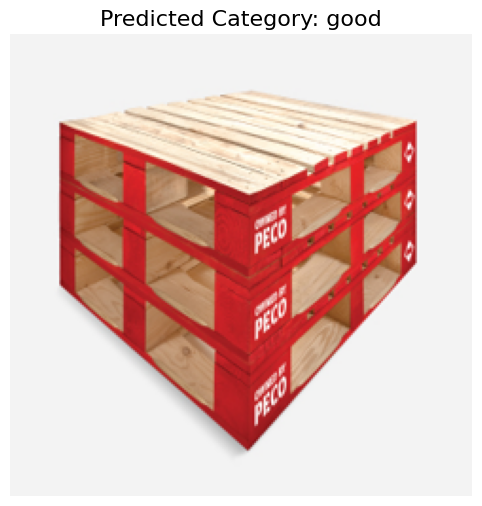

In [81]:
# Display the image with prediction
plt.figure(figsize=(8, 6))
plt.imshow(unseen_image)
plt.title(f"Predicted Category: {predicted_category}", fontsize=16)
plt.axis('off')
plt.show()